In [16]:
import pandas as pd

url = "https://raw.githubusercontent.com/jpospinalo/MachineLearning/refs/heads/main/EDA/credit3.csv"
data = pd.read_csv(url)
data.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,$85.425,$5182.0,402.0,6.0,60.0,12 years,No,No,NaN,East,$218.0
1,$49.927,$6396.0,485.0,3.0,75.0,17 years,Yes,No,Yes,South,$890.0
2,$10.403,$4159.0,310.0,3.0,43.0,7 years,No,No,Yes,West,$571.0
3,$30.413,$3690.0,299.0,2.0,25.0,15 years,Yes,Yes,No,West,$728.0
4,$24.088,$3665.0,287.0,4.0,NaN,13 years,Yes,No,Yes,South,$309.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     396 non-null    object 
 1   Limit      385 non-null    object 
 2   Rating     395 non-null    float64
 3   Cards      386 non-null    float64
 4   Age        387 non-null    float64
 5   Education  381 non-null    object 
 6   Own        388 non-null    object 
 7   Student    389 non-null    object 
 8   Married    383 non-null    object 
 9   Region     385 non-null    object 
 10  Balance    385 non-null    object 
dtypes: float64(3), object(8)
memory usage: 35.5+ KB


In [18]:
# Verificar valores faltantes
print(data[cols].isnull().sum())

# Verificar tipos de datos
print(data[cols].dtypes)

Age       25
Cards     26
Rating    17
dtype: int64
Age       float64
Cards     float64
Rating    float64
dtype: object


In [19]:
# Eliminar filas con NaN o reemplazar NaN con algún valor
data_clean = data[cols].dropna()
# o 
data_clean = data[cols].fillna(0)  # o con la media: data[cols].fillna(data[cols].mean())

# Luego calcular la correlación con datos limpios
cm = np.corrcoef(data_clean.values.T)

C:\Users\Diego\AppData\Roaming\Python\Python313\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


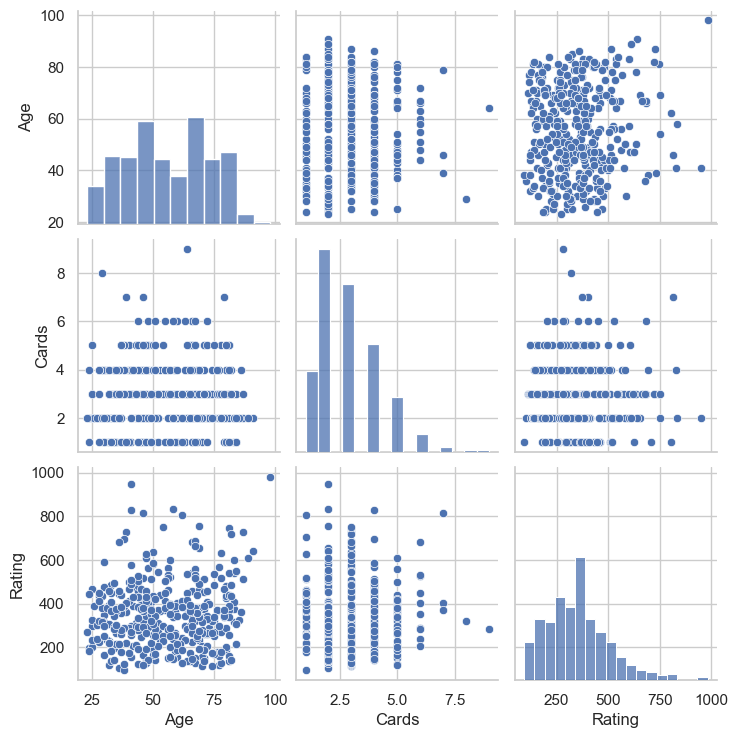

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", context="notebook")
cols = ['Age', 'Cards', 'Rating']
sns.pairplot(data[cols], size=2.5)
plt.show()

C:\Users\Diego\AppData\Roaming\Python\Python313\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Diego\AppData\Roaming\Python\Python313\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

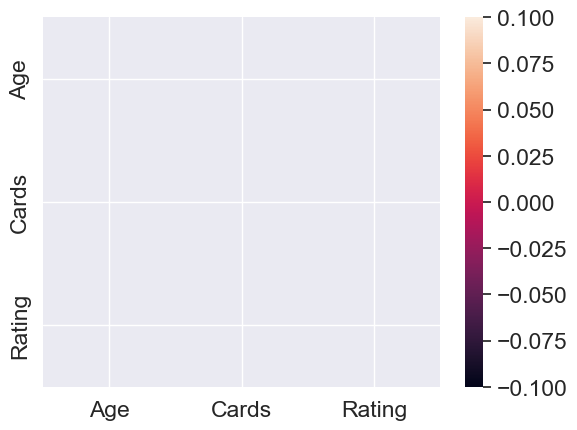

In [21]:
import numpy as np
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, 
            yticklabels=cols, xticklabels=cols)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = data_clean['Age'].values.reshape(-1, 1)   #definiendo la variable independiente
y = data_clean['Rating'].values #definiendo la variable dependiente

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

slr = LinearRegression()
slr.fit(x_std, y_std)   #ajustando el modelo


LinearRegression()

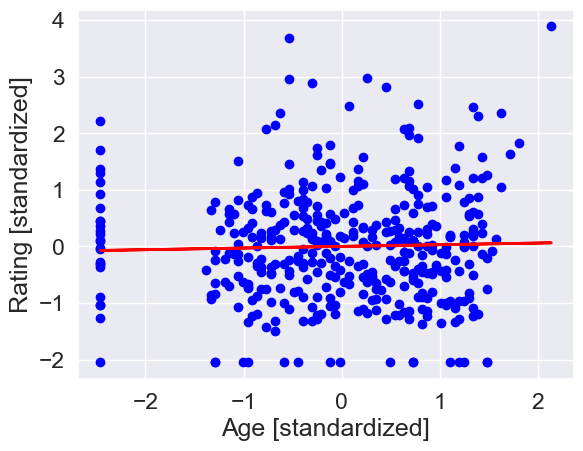

In [30]:
plt.scatter(x_std, y_std, c='blue')
plt.plot(x_std, slr.predict(x_std), color='red', linewidth=2)
plt.xlabel('Age [standardized]')
plt.ylabel('Rating [standardized]')
plt.show()

***Generando predicción con el modelo

In [33]:
num_cards = 100
age_cards_std = sc_x.transform(np.array([[num_cards]]).reshape(-1, 1))
rating_std = slr.predict(age_cards_std)

# Solución 1: Reformatear el array a 2D usando reshape
rating_std_2d = rating_std.reshape(-1, 1)  # Convertir a formato de columna (2D)
rating = sc_y.inverse_transform(rating_std_2d)
print('Rating:', rating[0])

# O alternativamente, si rating_std es solo un valor
# Solución 2: 
# rating = sc_y.inverse_transform([[rating_std[0]]])
# print('Rating:', rating[0][0])

Rating: [350.06817595]


In [3]:
data['Income'] = data['Income'].str.replace('$', '', regex=False)

In [5]:
data.head()


,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,85.425,$5182.0,402.0,6.0,60.0,12 years,No,No,NaN,East,$218.0
1,49.927,$6396.0,485.0,3.0,75.0,17 years,Yes,No,Yes,South,$890.0
2,10.403,$4159.0,310.0,3.0,43.0,7 years,No,No,Yes,West,$571.0
3,30.413,$3690.0,299.0,2.0,25.0,15 years,Yes,Yes,No,West,$728.0
4,24.088,$3665.0,287.0,4.0,NaN,13 years,Yes,No,Yes,South,$309.0


In [7]:
data['Income'] = pd.to_numeric(data['Income'], errors='coerce')

In [8]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,85.425,$5182.0,402.0,6.0,60.0,12 years,No,No,NaN,East,$218.0
1,49.927,$6396.0,485.0,3.0,75.0,17 years,Yes,No,Yes,South,$890.0
2,10.403,$4159.0,310.0,3.0,43.0,7 years,No,No,Yes,West,$571.0
3,30.413,$3690.0,299.0,2.0,25.0,15 years,Yes,Yes,No,West,$728.0
4,24.088,$3665.0,287.0,4.0,NaN,13 years,Yes,No,Yes,South,$309.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     386 non-null    float64
 1   Limit      385 non-null    object 
 2   Rating     395 non-null    float64
 3   Cards      386 non-null    float64
 4   Age        387 non-null    float64
 5   Education  381 non-null    object 
 6   Own        388 non-null    object 
 7   Student    389 non-null    object 
 8   Married    383 non-null    object 
 9   Region     385 non-null    object 
 10  Balance    385 non-null    object 
dtypes: float64(4), object(7)
memory usage: 35.5+ KB


In [16]:
data['Income'] = data['Income'].astype(str).str.replace('.', '', regex=False).astype(int)
data.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,85425000000,$5182.0,402.0,6.0,60.0,12 years,No,No,NaN,East,$218.0
1,49927000000,$6396.0,485.0,3.0,75.0,17 years,Yes,No,Yes,South,$890.0
2,10403000000,$4159.0,310.0,3.0,43.0,7 years,No,No,Yes,West,$571.0
3,30413000000,$3690.0,299.0,2.0,25.0,15 years,Yes,Yes,No,West,$728.0
4,24088000000,$3665.0,287.0,4.0,NaN,13 years,Yes,No,Yes,South,$309.0


In [17]:
data['Limit'] = data['Limit'].str.replace('$', '', regex=False)
data['Limit'] = pd.to_numeric(data['Limit'], errors='coerce')
print(data.head())

        Income   Limit  Rating  Cards   Age Education  Own Student Married  \
0  85425000000  5182.0   402.0    6.0  60.0  12 years   No      No     NaN   
1  49927000000  6396.0   485.0    3.0  75.0  17 years  Yes      No     Yes   
2  10403000000  4159.0   310.0    3.0  43.0   7 years   No      No     Yes   
3  30413000000  3690.0   299.0    2.0  25.0  15 years  Yes     Yes      No   
4  24088000000  3665.0   287.0    4.0   NaN  13 years  Yes      No     Yes   

  Region Balance  
0   East  $218.0  
1  South  $890.0  
2   West  $571.0  
3   West  $728.0  
4  South  $309.0  


In [18]:
data['Income'] = data['Income'] / 1000
data.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,85425000.0,5182.0,402.0,6.0,60.0,12 years,No,No,NaN,East,$218.0
1,49927000.0,6396.0,485.0,3.0,75.0,17 years,Yes,No,Yes,South,$890.0
2,10403000.0,4159.0,310.0,3.0,43.0,7 years,No,No,Yes,West,$571.0
3,30413000.0,3690.0,299.0,2.0,25.0,15 years,Yes,Yes,No,West,$728.0
4,24088000.0,3665.0,287.0,4.0,NaN,13 years,Yes,No,Yes,South,$309.0


In [20]:
data['Education'] = data['Education'].str.replace(' years', '', regex=False).astype('Int64')
data.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,85425000.0,5182.0,402.0,6.0,60.0,12,No,No,NaN,East,$218.0
1,49927000.0,6396.0,485.0,3.0,75.0,17,Yes,No,Yes,South,$890.0
2,10403000.0,4159.0,310.0,3.0,43.0,7,No,No,Yes,West,$571.0
3,30413000.0,3690.0,299.0,2.0,25.0,15,Yes,Yes,No,West,$728.0
4,24088000.0,3665.0,287.0,4.0,NaN,13,Yes,No,Yes,South,$309.0


In [21]:
data['Balance'] = data['Balance'].str.replace('$', '', regex=False)
data['Balance'] = data['Balance'].astype(float)
print(data.head())

       Income   Limit  Rating  Cards   Age  Education  Own Student Married  \
0  85425000.0  5182.0   402.0    6.0  60.0         12   No      No     NaN   
1  49927000.0  6396.0   485.0    3.0  75.0         17  Yes      No     Yes   
2  10403000.0  4159.0   310.0    3.0  43.0          7   No      No     Yes   
3  30413000.0  3690.0   299.0    2.0  25.0         15  Yes     Yes      No   
4  24088000.0  3665.0   287.0    4.0   NaN         13  Yes      No     Yes   

  Region  Balance  
0   East    218.0  
1  South    890.0  
2   West    571.0  
3   West    728.0  
4  South    309.0  


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     412 non-null    float64
 1   Limit      385 non-null    float64
 2   Rating     395 non-null    float64
 3   Cards      386 non-null    float64
 4   Age        387 non-null    float64
 5   Education  381 non-null    Int64  
 6   Own        388 non-null    object 
 7   Student    389 non-null    object 
 8   Married    383 non-null    object 
 9   Region     385 non-null    object 
 10  Balance    385 non-null    float64
dtypes: Int64(1), float64(6), object(4)
memory usage: 35.9+ KB


In [23]:
df_it = pd.read_csv("https://raw.githubusercontent.com/jpospinalo/MachineLearning/refs/heads/main/EDA/IT%20Salary%20Survey%20EU%202020.csv")
df_it.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [25]:
df_it.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [26]:
threshold = 1253 * 0.4
# Retain only columns with at least 40% non-null values (i.e. at least 0.4 * 1253 non-null entries)
df_it_clean = df_it.loc[:, df_it.notnull().sum() >= threshold]
df_it_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 21 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Timestamp                                                                                                 1253 non-null   object 
 1   Age                                                                                                       1226 non-null   float64
 2   Gender                                                                                                    1243 non-null   object 
 3   City                                                                                                      1253 non-null   object 
 4   Position                                                                      

In [29]:
df_it.head()


,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


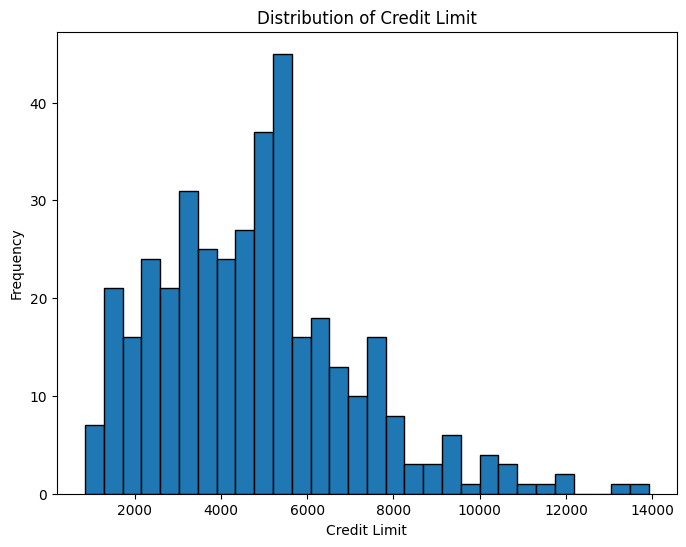

In [3]:
import matplotlib.pyplot as plt

try:
	data
except NameError:
	import pandas as pd
	url = "https://raw.githubusercontent.com/jpospinalo/MachineLearning/refs/heads/main/EDA/credit3.csv"
	data = pd.read_csv(url)

if data['Limit'].dtype == object:
	data['Limit'] = data['Limit'].str.replace('$', '', regex=False)
	data['Limit'] = pd.to_numeric(data['Limit'], errors='coerce')
	
plt.figure(figsize=(8, 6))
plt.hist(data['Limit'].dropna(), bins=30, edgecolor='black')
plt.title("Distribution of Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Frequency")
plt.show()

In [5]:
import numpy as np
from sklearn.impute import SimpleImputer
# Crear una instancia de SimpleImputer para reemplazar los valores faltantes (np.nan) por el valor medio
# calculado en cada columna a partir de los datos de entrenamiento.
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# Ajustar el imputer en datos de ejemplo para calcular la media en cada columna.
# Estos datos de ejemplo tienen un valor faltante que se imputará para la demostración.
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

# X ya está definido en una celda anterior como:
# X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
# Aplicar la transformación para imputar los valores faltantes en X.
print(imp_mean.transform(X))


[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]
